<h1>Olympic Games Analysis</h1>

## Table of Contents

- [Introduction](#intro)
- [Questions](#questions)
- [Data Preparation & Exploration](#eda)
- [Athlete Participation in the Olympic Games](#participation)
- [Top Medaling Countries in the Olympic Games](#countries)
- [Top Female Gold Medalists](#female gold)
- [Top Male Gold Medalists](#male gold)
- [Average Height, Weight, & Age of Female Athletes by Discipline](#female avgs)
- [Average Height, Weight, & Age of Male Athletes by Discipline](#male avgs)


<a id = 'intro'></a>
## Introduction

The motivation behind this project was to use data to answer a series of questions surrounding the Olympic games from 1896 to 2016.

<a id = 'questions'></a>
## Questions

1. What is the athlete participation rate at the Olympic Games in the past 120 years?
    * How did the athelete participation rate differ from Summer and Winter games?
2. What countries came up on top in the Olympic Games?
    * Which countries had the most gold medals?
    * Which countries had the most silver medals?
    * Which countries had the most bronze medals?
3. Who are the top female and male athletes of all time?
4. What were the average height, weight, and age of female athletes (by discipline)?
5. What were the average height, weight, and age of male athletes (by discipline)?

<a id = 'eda'></a>
## Data Preparation & Exploration

In [31]:
# Load Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from bokeh.plotting import output_notebook, output_file, figure, show
from bokeh.palettes import Plasma256, Cividis256
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
output_notebook()

Loading BokehJS ...

In [32]:
# Load Olympic CSV file

olympic_data = pd.read_csv('Data/athlete_events_edt.csv')
olympic_data.shape

(271116, 15)

In [33]:
# Load NOC CSV file

noc_data = pd.read_csv('Data/noc_regions.csv')
noc_data.shape

(231, 3)

In [34]:
# Preview Olympic dataset

olympic_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [35]:
# Preview NOC dataset

noc_data.head()

,NOC,Region,Notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [36]:
# Merge Olympic dataset with NOC dataset to by 'NOC' Country and rename Region --> Country

olympic_metadata = pd.merge(olympic_data, noc_data, on = 'NOC', how = 'left')
olympic_metadata = olympic_metadata.rename(columns = {'Region':'Country'})
olympic_metadata.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


In [37]:
# Inspect Olympic dataset

olympic_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID         271116 non-null int64
Name       271116 non-null object
Sex        271116 non-null object
Age        261642 non-null float64
Height     210945 non-null float64
Weight     208241 non-null float64
Team       271116 non-null object
NOC        271116 non-null object
Games      271116 non-null object
Year       271116 non-null int64
Season     271116 non-null object
City       271116 non-null object
Sport      271116 non-null object
Event      271116 non-null object
Medal      39783 non-null object
Country    271116 non-null object
Notes      4317 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [38]:
olympic_metadata.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [39]:
# Inspect missing data
olympic_metadata.isnull().sum()

ID              0
Name            0
Sex             0
Age          9474
Height      60171
Weight      62875
Team            0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal      231333
Country         0
Notes      266799
dtype: int64

Missing data occurs in the "Age", "Height", "Weight", "Medal", and "Notes" columns.
- "Medal" column has a lot of NaN because not every athlete medaled.
- "Notes" column has names of countries that are 'formerly known as' and therefore has a lot of NaN.


<a id = 'participation'></a>
## Athlete Participation in the Olympic Games

In [40]:
# Create new dataframe to analyze athlete participation in Olympics.
# Using value counts on 'ID' to avoid counting same althletes

athl_count = olympic_metadata.groupby(['Games', 'City'])['ID'].value_counts()
athl_count = athl_count.groupby(['Games']).count().reset_index()
athl_count = athl_count.rename(columns = {'ID': 'Athlete Count'})
athl_count.head()

,Games,Athlete Count
0,1896 Summer,176
1,1900 Summer,1224
2,1904 Summer,650
3,1906 Summer,841
4,1908 Summer,2024


In [41]:
# Split Games Column into two columns (Year and Season)

yr_ssn = pd.DataFrame(athl_count.Games.str.split(' ', 1).tolist(), columns = ['Year', 'Season'])
yr_ssn.head()

,Year,Season
0,1896,Summer
1,1900,Summer
2,1904,Summer
3,1906,Summer
4,1908,Summer


In [67]:
# Merge the two Dataframes(concatenation) and drop 'Games' column
# Also need to change 'Year' column from str to int
olympic_athl = pd.concat([yr_ssn, athl_count], axis = 1)
olympic_athl = olympic_athl.drop(columns = 'Games')
olympic_athl['Year'] = pd.to_numeric(olympic_athl['Year'])
olympic_athl

,Year,Season,Athlete Count
0,1896,Summer,176
1,1900,Summer,1224
2,1904,Summer,650
3,1906,Summer,841
4,1908,Summer,2024
5,1912,Summer,2409
6,1920,Summer,2676
7,1924,Summer,3256
8,1924,Winter,313
9,1928,Summer,3247


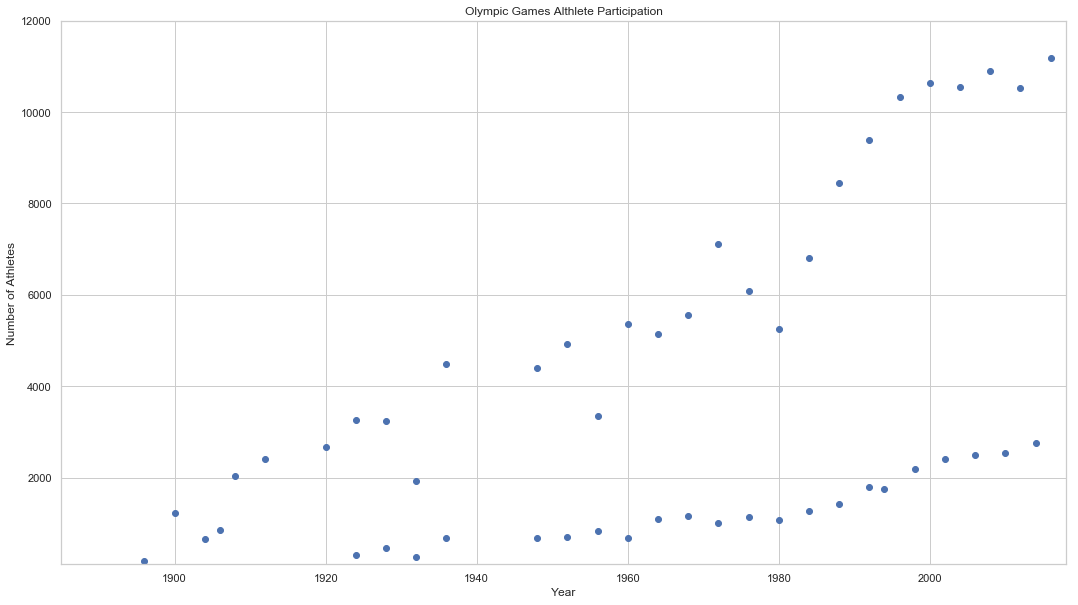

In [56]:
# Create scatterplot to analyze overall athlete participation in Olympic games

# Set seaborn style and figure size)
sns.set(style = 'whitegrid')
plt.figure(figsize = (18, 10))

# Give chart title, labels, and limits
plt.title('Olympic Games Althlete Participation')
plt.xlabel('Year')
plt.xlim(1885, 2018)
plt.ylabel('Number of Athletes')
plt.ylim(100, 12000)
plt.scatter(x = olympic_athl['Year'], y = olympic_athl['Athlete Count'])
plt.savefig('Visualization/Olympic Athlete Participation.png')

In [62]:
# Create a new dataframe for Summer games

summer_games = olympic_athl.loc[olympic_athl['Season'] == 'Summer'].reset_index(drop = True)
summer_games.shape

(29, 3)

In [63]:
summer_games

,Year,Season,Athlete Count
0,1896,Summer,176
1,1900,Summer,1224
2,1904,Summer,650
3,1906,Summer,841
4,1908,Summer,2024
5,1912,Summer,2409
6,1920,Summer,2676
7,1924,Summer,3256
8,1928,Summer,3247
9,1932,Summer,1922


In [64]:
# Create new dataframe for Winter games

winter_games = olympic_athl.loc[olympic_athl['Season'] == 'Winter'].reset_index(drop = True)
winter_games.shape

(22, 3)

In [65]:
winter_games

,Year,Season,Athlete Count
0,1924,Winter,313
1,1928,Winter,461
2,1932,Winter,252
3,1936,Winter,668
4,1948,Winter,668
5,1952,Winter,694
6,1956,Winter,821
7,1960,Winter,665
8,1964,Winter,1094
9,1968,Winter,1160


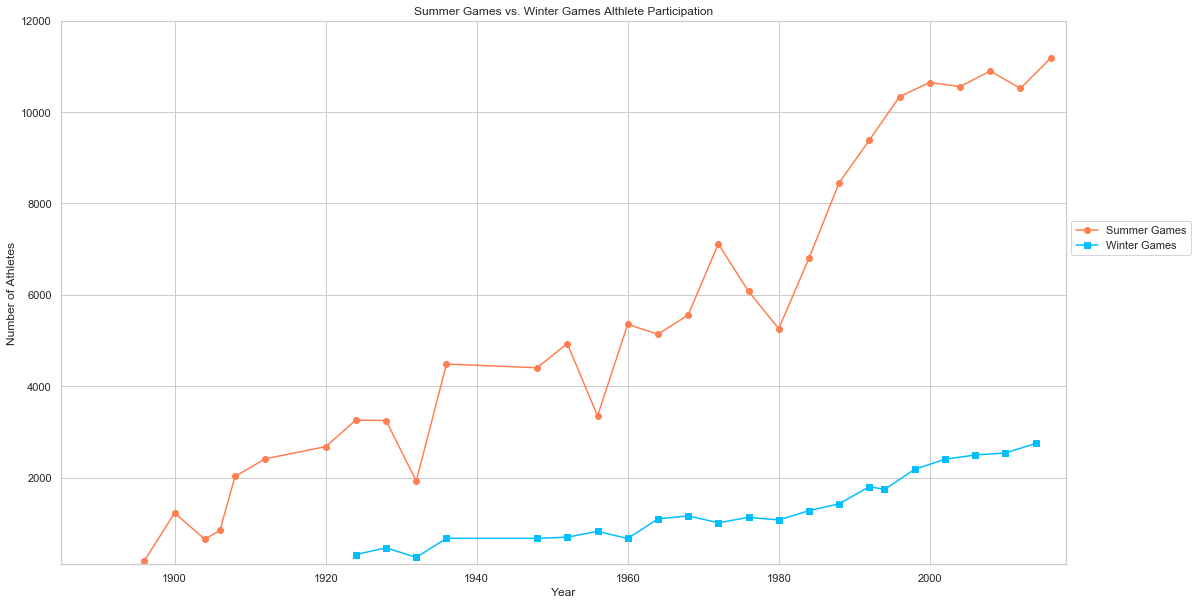

In [66]:
# Create multi-line graph to compare athlete participation in both games

# Set seaborn style and figure size)
sns.set(style = 'whitegrid')
plt.figure(figsize = (18, 10))

# Give chart title, labels, and limits
plt.title('Summer Games vs. Winter Games Althlete Participation')
plt.xlabel('Year')
plt.xlim(1885, 2018)
plt.ylabel('Number of Athletes')
plt.ylim(100, 12000)

# Create handles for legend and plot multi-line graph
Summer, = plt.plot(summer_games['Year'], summer_games['Athlete Count'], 
                  marker = 'o', color = 'coral', label = 'Summer Games')
Winter, = plt.plot(winter_games['Year'], winter_games['Athlete Count'], 
                  marker = 's', color = 'deepskyblue', label = 'Winter Games')
plt.legend(handles = [Summer, Winter], loc = 'center left', bbox_to_anchor = (1, 0.6))
plt.savefig('Visualization/Summer Games vs Winter Games.png')
plt.show()

<a id = 'countries'></a>
## Top Medaling Countries in the Olympic Games

In [69]:
# Drop athletes that did not medal

medal_df = olympic_metadata.dropna(subset = ['Medal'])
medal_df.shape

(39783, 17)

In [70]:
# Create Dataframe with Country Medal Count

country_medal_ct = medal_df.groupby(['Country'])['Medal'].count().reset_index(name = 'Medal Count') 
country_medal_ct.head()

,Country,Medal Count
0,Afghanistan,2
1,Algeria,17
2,Argentina,274
3,Armenia,16
4,Australia,1349


In [71]:
# Create Dataframe with top ten countries in medal count

top_ten_countries = country_medal_ct.sort_values('Medal Count', ascending = False).head(10).reset_index(drop = True)
top_ten_countries

,Country,Medal Count
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2068
4,France,1777
5,Italy,1637
6,Sweden,1536
7,Canada,1352
8,Australia,1349
9,Hungary,1135


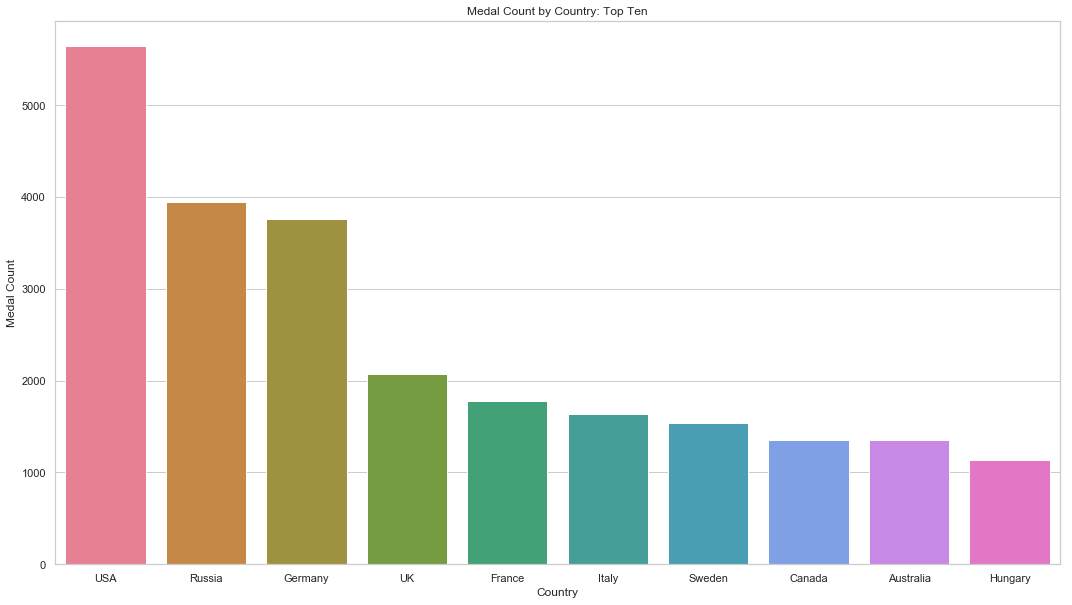

In [72]:
# Set seaborn style and figure size)
sns.set(style = 'whitegrid')
plt.figure(figsize = (18, 10))

# Give chart title, labels, and limits
plt.title('Medal Count by Country: Top Ten')
plt.xlabel('Country')
plt.ylabel('Number of Medals Won')

# Plot barplot
sns.barplot(x = top_ten_countries['Country'], 
            y = top_ten_countries['Medal Count'], 
            palette = 'husl')

plt.savefig('Visualization/Top Ten Countries.png')

In [73]:
# Create a Dataframe with Country, type of medal won, and medal count

medal_ct = medal_df.groupby(['Country'])['Medal'].value_counts().reset_index(name = 'Medal Count')
medal_ct.head()

,Country,Medal,Medal Count
0,Afghanistan,Bronze,2
1,Algeria,Bronze,8
2,Algeria,Gold,5
3,Algeria,Silver,4
4,Argentina,Silver,92


In [74]:
# Create a Dataframe with the top five countries who won the most gold medals

gold = medal_ct.loc[medal_ct['Medal'] == 'Gold'].reset_index(drop = True)
top_five_gold = gold.sort_values('Medal Count', ascending = False).head(5).reset_index(drop = True)
top_five_gold

,Country,Medal,Medal Count
0,USA,Gold,2638
1,Russia,Gold,1599
2,Germany,Gold,1301
3,UK,Gold,678
4,Italy,Gold,575


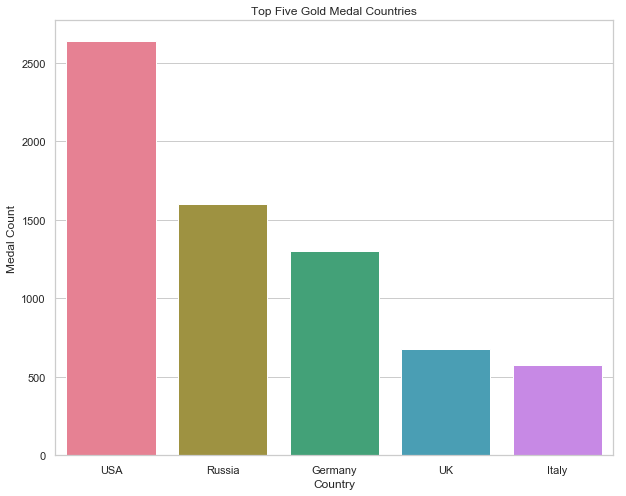

In [75]:
# Set seaborn style and figure size)
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))

# Give chart title, labels, and limits
plt.title('Top Five Gold Medal Countries')
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals Won')

# Plot barplot
sns.barplot(x = top_five_gold['Country'], 
            y = top_five_gold['Medal Count'], 
            palette = 'husl')

plt.savefig('Visualization/Top Five Gold.png')

In [76]:
# Create a Dataframe with the top five countries who won the most silver medals

silver = medal_ct.loc[medal_ct['Medal'] == 'Silver'].reset_index(drop = True)
top_five_silver = silver.sort_values('Medal Count', ascending = False).head(5).reset_index(drop = True)
top_five_silver

,Country,Medal,Medal Count
0,USA,Silver,1641
1,Germany,Silver,1195
2,Russia,Silver,1170
3,UK,Silver,739
4,France,Silver,610


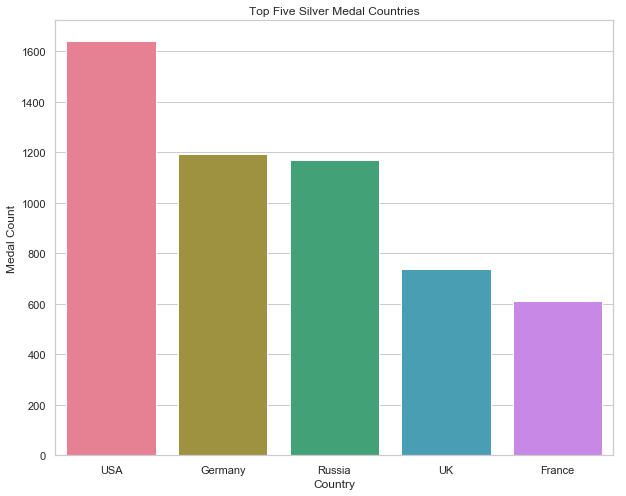

In [77]:
# Set seaborn style and figure size)
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))

# Give chart title, labels, and limits
plt.title('Top Five Silver Medal Countries')
plt.xlabel('Country')
plt.ylabel('Number of Silver Medals Won')

# Plot barplot
sns.barplot(x = top_five_silver['Country'], 
            y = top_five_silver['Medal Count'], 
            palette = 'husl')

plt.savefig('Visualization/Top Five Silver.png')

In [78]:
# Create a Dataframe with the top five countries who won the most bronze medals

bronze = medal_ct.loc[medal_ct['Medal'] == 'Bronze'].reset_index(drop = True)
top_five_bronze = bronze.sort_values('Medal Count', ascending = False).head(5).reset_index(drop = True)
top_five_bronze

,Country,Medal,Medal Count
0,USA,Bronze,1358
1,Germany,Bronze,1260
2,Russia,Bronze,1178
3,France,Bronze,666
4,UK,Bronze,651


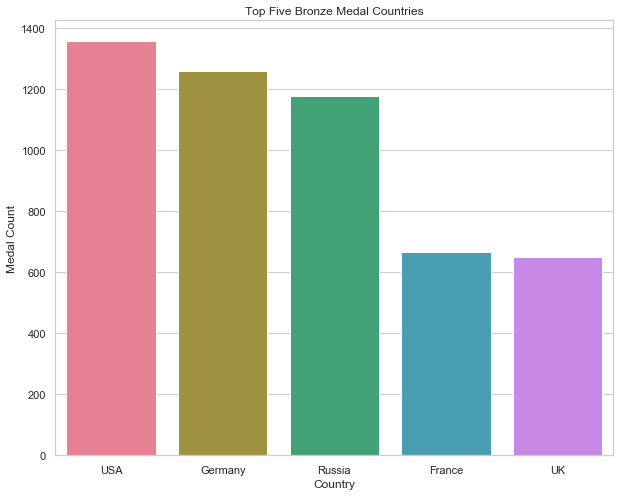

In [79]:
# Set seaborn style and figure size)
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))

# Give chart title, labels, and limits
plt.title('Top Five Bronze Medal Countries')
plt.xlabel('Country')
plt.ylabel('Number of Bronze Medals Won')

# Plot barplot
sns.barplot(x = top_five_bronze['Country'], 
            y = top_five_bronze['Medal Count'], 
            palette = 'husl')

plt.savefig('Visualization/Top Five Bronze.png')

<a id = 'female gold'></a>
## Top Female Gold Medalists

In [80]:
# Create a Dataframe with gold medalist athletes

gold_athletes = medal_df.groupby(['Name', 'Sex', 'Sport'])['Medal'].count().reset_index(name = 'Golds Won')
gold_athletes.head()

,Name,Sex,Sport,Golds Won
0,A. Albert,M,Rugby,1
1,A. Dubois,M,Sailing,2
2,"A. Joshua ""Josh"" West",M,Rowing,1
3,A. Lawry,M,Rugby,1
4,A. M. Woods,M,Lacrosse,1


In [81]:
# Create Dataframe with top female gold medalists

female_gold = gold_athletes[gold_athletes['Sex'] == 'F']
female_gold = female_gold.sort_values('Golds Won', ascending = False).head(5).reset_index(drop = True)
female_gold

,Name,Sex,Sport,Golds Won
0,Larysa Semenivna Latynina (Diriy-),F,Gymnastics,18
1,Natalie Anne Coughlin (-Hall),F,Swimming,12
2,"Dara Grace Torres (-Hoffman, -Minas)",F,Swimming,12
3,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",F,Swimming,12
4,Birgit Fischer-Schmidt,F,Canoeing,12


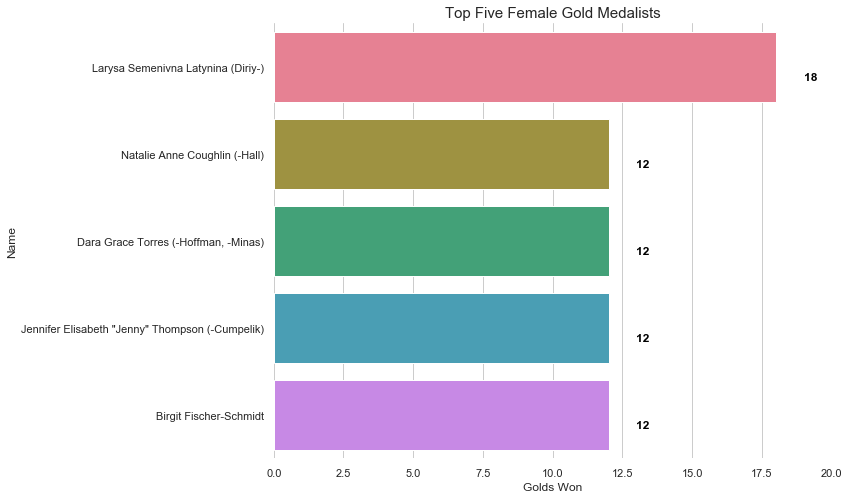

In [82]:
# Set seaborn style and figure size)
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))

# Give chart title, labels, and limits
plt.title('Top Five Female Gold Medalists', fontsize = 15)
plt.xlabel('Number of Gold Medals Won')
plt.xlim(0, 20)
plt.ylabel('Name of Athlete')


# Plot barplot
sns.barplot(x = female_gold['Golds Won'], y = female_gold['Name'],
           palette = 'husl')
           
# Text of number of medals (at end of each bar)
for i, v in enumerate(female_gold['Golds Won']):
    plt.text(v + 1, i + .15, str(v), color = 'black', fontweight = 'bold', fontsize = 12)

# Removing axes spines
sns.despine(left = True, bottom = True)

plt.savefig('Visualization/Top Female Gold Medalists.png')

<a id = 'male gold'></a>
## Top Male Gold Medalist

In [83]:
# Create Dataframe with top male gold medalists
male_gold = gold_athletes[gold_athletes['Sex'] == 'M']
male_gold = male_gold.sort_values('Golds Won', ascending = False).head(5).reset_index(drop = True)
male_gold

,Name,Sex,Sport,Golds Won
0,"Michael Fred Phelps, II",M,Swimming,28
1,Nikolay Yefimovich Andrianov,M,Gymnastics,15
2,Takashi Ono,M,Gymnastics,13
3,Borys Anfiyanovych Shakhlin,M,Gymnastics,13
4,Ole Einar Bjrndalen,M,Biathlon,13


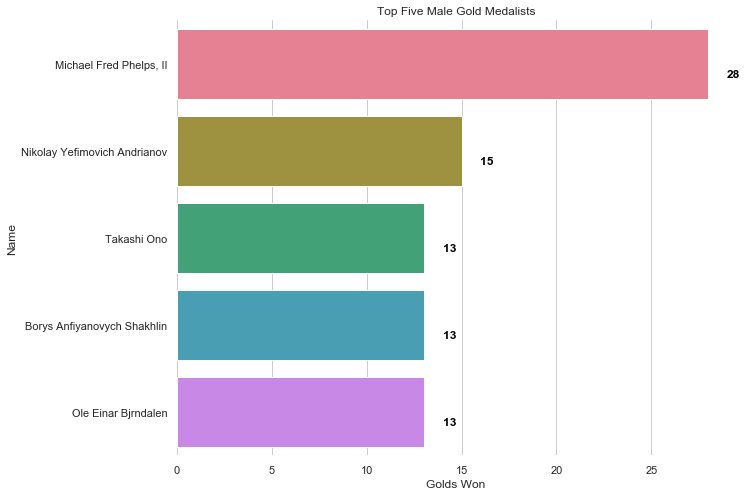

In [84]:
# Set seaborn style and figure size
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 8))

# Give chart title, labels, and limits
plt.title('Top Five Male Gold Medalists')
plt.xlabel('Number of Gold Medals Won')
plt.ylabel('Name of Athlete')

# Plot barplot
sns.barplot(x = male_gold['Golds Won'], y = male_gold['Name'],
           palette = 'husl')

# Text for number of medals (at the end of each bar)
for i, v in enumerate(male_gold['Golds Won']):
    plt.text(v + 1, i + .15, str(v), color = 'black', fontweight = 'bold', fontsize = 12)

# Removing axes spines
sns.despine(left = True, bottom = True)

plt.savefig('Visualization/Top Male Gold Medalists.png')

<a id = 'female avgs'></a>
## Average Height, Weight, & Age of Female Athletes by Discipline

In [85]:
# Get athlete average athlete height, weight, and age by discipline and gender

athlete_info = olympic_metadata.groupby(['Sport', 'Sex'])['Height', 'Weight', 'Age'].mean().dropna().reset_index()
athlete_info = athlete_info.round({'Height': 2, 'Weight': 2})
athlete_info['Age'] = athlete_info['Age'].astype(int)
athlete_info.head()

,Sport,Sex,Height,Weight,Age
0,Alpine Skiing,F,167.22,62.64,22
1,Alpine Skiing,M,177.89,78.63,23
2,Archery,F,167.17,62.01,26
3,Archery,M,178.48,77.07,29
4,Art Competitions,M,174.90,75.29,46


In [86]:
# Retrieve all female info
female_info = athlete_info.loc[athlete_info['Sex'] == 'F'].reset_index(drop = True)
female_info.head()

,Sport,Sex,Height,Weight,Age
0,Alpine Skiing,F,167.22,62.64,22
1,Archery,F,167.17,62.01,26
2,Athletics,F,169.29,60.24,24
3,Badminton,F,168.44,61.59,25
4,Basketball,F,182.45,73.69,25


In [87]:
# Create output to static HTML file
output_file('Visualization/Avg. Female Athlete Info.html')

# Create column data source
female_src = ColumnDataSource(female_info)

# Create cmapper for color
f_cmapper = factor_cmap('Sport', palette = Plasma256, factors = female_info['Sport'])

# Create Scatterplot
p = figure()
p.scatter(x = 'Weight', y = 'Height', source = female_src, size = 'Age',
         alpha = 0.7, fill_color = f_cmapper, color = f_cmapper)

# Add title and axis labels
p.title.text = 'Average Height & Weight of Female Athletes by Discipline'
p.xaxis.axis_label = 'Weight (km)'
p.yaxis.axis_label = 'Height (cm)'

# Add hover tool info
hover = HoverTool()
hover.tooltips = [
    ('Discipline', '@Sport'),
    ('Avg. Age', '@Age'),
    ('Avg. Height', '@Height'),
    ('Avg. Weight', '@Weight')
]

p.add_tools(hover)

show(p)

<a id = 'male avgs'></a>
## Average Height, Weight, & Age of Male Athletes by Discipline

In [88]:
# Retrieve all male info
male_info = athlete_info.loc[athlete_info['Sex'] == 'M'].reset_index(drop = True)
male_info.head()

,Sport,Sex,Height,Weight,Age
0,Alpine Skiing,M,177.89,78.63,23
1,Archery,M,178.48,77.07,29
2,Art Competitions,M,174.90,75.29,46
3,Athletics,M,179.77,73.84,25
4,Badminton,M,179.62,74.36,26


In [89]:
# Create output to static HTML file
output_file('Visualization/Avg. Male Athlete Info.html')

# Create column data source
male_src = ColumnDataSource(male_info)

# Create cmapper for color
m_cmapper = factor_cmap('Sport', palette = Cividis256, factors = male_info['Sport'])

# Create Scatterplot
p = figure()
p.scatter(x = 'Weight', y = 'Height', source = male_src, size = 'Age', 
          alpha = 0.7, fill_color = m_cmapper, color = m_cmapper)

# Add title and axis labels
p.title.text = 'Average Height & Weight of Male Athletes by Discipline'
p.xaxis.axis_label = 'Weight (km)'
p.yaxis.axis_label = 'Height (cm)'

# Add hover tool info
hover = HoverTool()
hover.tooltips = [
    ('Discipline', '@Sport'),
    ('Avg. Age', '@Age'),
    ('Avg. Height', '@Height'),
    ('Avg. Weight', '@Weight')
]

p.add_tools(hover)

show(p)